In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 한글깨짐방지- window 
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 한글깨짐방지- mac 
# from matplotlib import rc
# rc('font', family='AppleGothic')
# plt.rcParams['axes.unicode_minus'] = False

In [2]:
# data load
# encoding : 윈도우즈 환경에서의 한글 처리
# engine : python 3.6에서 한글이 포함된 파일이름 사용
raw_data = pd.read_csv('../../data/seoul_pollution.csv', encoding='CP949', engine='python')

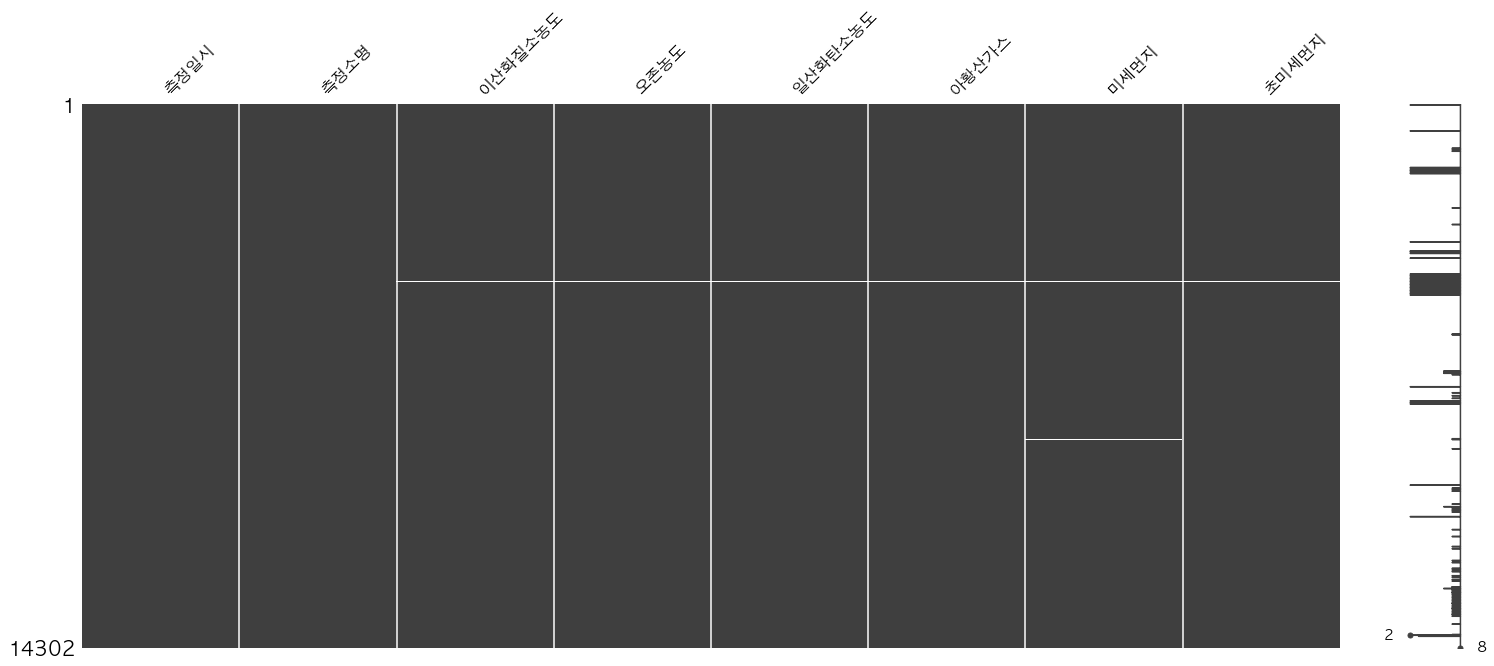

In [3]:
# 결측치 확인 
import missingno as msno
msno.matrix(raw_data)

# 결측치 보간하기
- 결측치 삭제
- 결측치 0으로 채우기 
- 결측치를 평균으로 채우기 
- interpolation방법을 이용하여 채우기 


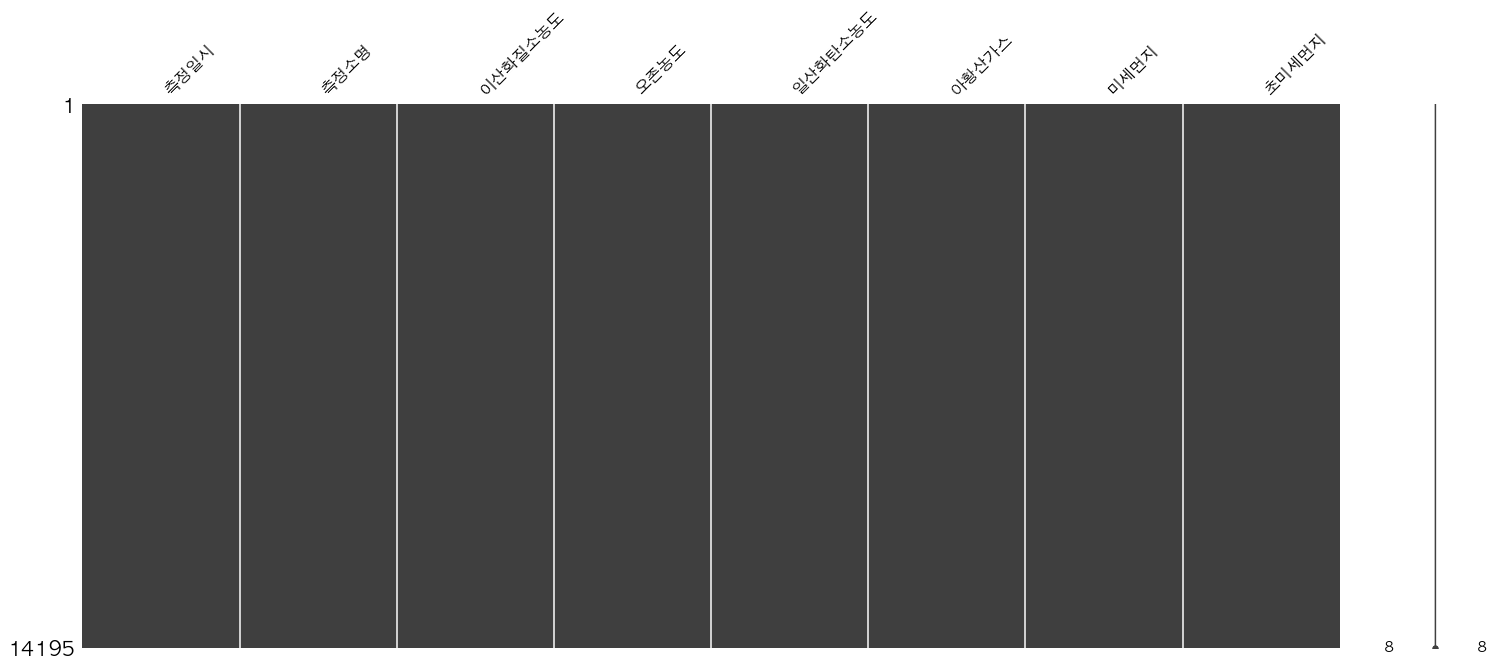

In [6]:
# 1. 결측치 삭제 == dropna()
result1 = raw_data.dropna() 
msno.matrix(result1)

In [7]:
# 2. 결측치를 채우기 == fillna(?) 
# 결측치를 0으로 채우기 
raw_data.fillna(0)

,측정일시,측정소명,이산화질소농도,오존농도,일산화탄소농도,아황산가스,미세먼지,초미세먼지
0,20160606,강남구,0.020,0.041,0.2,0.004,23.0,15.0
1,20160606,강동구,0.012,0.040,0.3,0.004,24.0,16.0
2,20160606,강변북로,0.046,0.025,0.3,0.004,28.0,15.0
3,20160606,강북구,0.020,0.044,0.3,0.002,16.0,12.0
4,20160606,강서구,0.023,0.029,0.3,0.005,33.0,22.0
...,...,...,...,...,...,...,...,...
14297,20150606,중구,0.035,0.041,0.4,0.005,31.0,22.0
14298,20150606,중랑구,0.023,0.041,0.3,0.005,31.0,18.0
14299,20150606,청계천,0.040,0.038,0.5,0.009,34.0,12.0
14300,20150606,청량리,0.044,0.034,0.5,0.005,33.0,24.0


In [9]:
raw_data.columns

Index(['측정일시', '측정소명', '이산화질소농도', '오존농도', '일산화탄소농도', '아황산가스', '미세먼지', '초미세먼지'], dtype='object')

In [10]:
raw_data['이산화질소농도'].mean()

0.03798316498316499

In [11]:
raw_data['오존농도'].mean()

0.021037382522092862

In [12]:
# raw_data.mean(axis =1 ) # 열평균 
# raw_data.mean(axis =0 ) # 행평균 

측정일시       2.015497e+07
이산화질소농도    3.798316e-02
오존농도       2.103738e-02
일산화탄소농도    5.663629e-01
아황산가스      5.459179e-03
미세먼지       4.745279e+01
초미세먼지      2.482650e+01
dtype: float64

In [8]:
# 3. 결측치를 평균 으로 채우기
평균 = raw_data.mean() # raw_data의 평균 
raw_data.fillna(평균)

,측정일시,측정소명,이산화질소농도,오존농도,일산화탄소농도,아황산가스,미세먼지,초미세먼지
0,20160606,강남구,0.020,0.041,0.2,0.004,23.0,15.0
1,20160606,강동구,0.012,0.040,0.3,0.004,24.0,16.0
2,20160606,강변북로,0.046,0.025,0.3,0.004,28.0,15.0
3,20160606,강북구,0.020,0.044,0.3,0.002,16.0,12.0
4,20160606,강서구,0.023,0.029,0.3,0.005,33.0,22.0
...,...,...,...,...,...,...,...,...
14297,20150606,중구,0.035,0.041,0.4,0.005,31.0,22.0
14298,20150606,중랑구,0.023,0.041,0.3,0.005,31.0,18.0
14299,20150606,청계천,0.040,0.038,0.5,0.009,34.0,12.0
14300,20150606,청량리,0.044,0.034,0.5,0.005,33.0,24.0


In [16]:
# 4. interpolationa 방법을 사용하기
# 각 열의 값을 보고 채우기 axis=0 
# pandas interpolate(보간법) 함수를 사용해서 결측치를 채운다
# method=linear 보간법 함수가 linear 
# limit_direction='backward' # 뒤에서 부터 채워 오기 
# imit_direction='forward' # 앞에서 채우기 
# imit_direction='both' # 양 옆에서 채워나가기 

In [ ]:
raw_data.fillna()

In [16]:
# axis=0열 
raw_data.interpolate(method='linear', axis=0, limit_direction='both')

,측정일시,측정소명,이산화질소농도,오존농도,일산화탄소농도,아황산가스,미세먼지,초미세먼지
0,20160606,강남구,0.020,0.041,0.2,0.004,23.0,15.0
1,20160606,강동구,0.012,0.040,0.3,0.004,24.0,16.0
2,20160606,강변북로,0.046,0.025,0.3,0.004,28.0,15.0
3,20160606,강북구,0.020,0.044,0.3,0.002,16.0,12.0
4,20160606,강서구,0.023,0.029,0.3,0.005,33.0,22.0
...,...,...,...,...,...,...,...,...
14297,20150606,중구,0.035,0.041,0.4,0.005,31.0,22.0
14298,20150606,중랑구,0.023,0.041,0.3,0.005,31.0,18.0
14299,20150606,청계천,0.040,0.038,0.5,0.009,34.0,12.0
14300,20150606,청량리,0.044,0.034,0.5,0.005,33.0,24.0


<div class="alert alert-success" data-title="">
  <h2><i class="fa fa-tasks" aria-hidden="true"></i> 초미세먼지 예측해보기
  </h2>
</div>

- 1. 측정일시, 측정소명 드랍 
- 2. 결측치 평균값으로 체우기 
- 3. Minmaxscaler사용하여 스케일링하기 
- 4. X,y, 설정    
```python
X = 초미세먼지 제외 나머지 
y = 초미세먼지
```
- 5. 모델링 3개 모델 사용하기 
```python
# 모델가져오기 
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
model_linear = LinearRegression()
model_lasso = Lasso()
model_elastic = ElasticNet()
```

- 6. 평가 
R2 score로 평가하기

In [17]:
raw_data = pd.read_csv('../../data/seoul_pollution.csv',
                       encoding='CP949', engine='python')

In [22]:
# 삭제 
raw_data = raw_data.drop(['측정일시', '측정소명'], axis=1)
raw_data

,이산화질소농도,오존농도,일산화탄소농도,아황산가스,미세먼지,초미세먼지
0,0.020,0.041,0.2,0.004,23.0,15.0
1,0.012,0.040,0.3,0.004,24.0,16.0
2,0.046,0.025,0.3,0.004,28.0,15.0
3,0.020,0.044,0.3,0.002,16.0,12.0
4,0.023,0.029,0.3,0.005,33.0,22.0
...,...,...,...,...,...,...
14297,0.035,0.041,0.4,0.005,31.0,22.0
14298,0.023,0.041,0.3,0.005,31.0,18.0
14299,0.040,0.038,0.5,0.009,34.0,12.0
14300,0.044,0.034,0.5,0.005,33.0,24.0


In [23]:
# 결측치 평균값으로 체우기
평균 = raw_data.mean() # 평균을 구해서 평균이라는 변수에 저장 
raw_data = raw_data.fillna(평균)

In [24]:
# Minmaxscaler사용하여 스케일링하기
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # 스케일러 정의
raw_scaled = scaler.fit_transform(raw_data) # 변환 

In [26]:
# 변환 한 데이터 --> DataFrame 
df = pd.DataFrame(raw_scaled,
                  columns=raw_data.columns)

,이산화질소농도,오존농도,일산화탄소농도,아황산가스,미세먼지,초미세먼지
0,0.150442,0.445652,0.007968,0.148148,0.074906,0.142857
1,0.079646,0.434783,0.011952,0.148148,0.078652,0.153846
2,0.380531,0.271739,0.011952,0.148148,0.093633,0.142857
3,0.150442,0.478261,0.011952,0.074074,0.048689,0.109890
4,0.176991,0.315217,0.011952,0.185185,0.112360,0.219780
...,...,...,...,...,...,...
14297,0.283186,0.445652,0.015936,0.185185,0.104869,0.219780
14298,0.176991,0.445652,0.011952,0.185185,0.104869,0.175824
14299,0.327434,0.413043,0.019920,0.333333,0.116105,0.109890
14300,0.362832,0.369565,0.019920,0.185185,0.112360,0.241758


In [27]:
# X,y, 설정
# drop 데이터 프레임만 사용가능 
X = df.drop(['초미세먼지'], axis=1)
y = df['초미세먼지']

In [34]:
# train_test_split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y)

In [45]:
# 모델링 3개 모델 사용하
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
# 모델 불러와서 학습 하기 
model_linear = LinearRegression().fit(X_train, y_train)
model_lasso = Lasso().fit(X_train, y_train)
model_elastic = ElasticNet().fit(X_train, y_train)


In [46]:
print(model_linear.score(X_test,y_test))
print(model_lasso.score(X_test,y_test))
print(model_elastic.score(X_test,y_test))

0.46884636344657504
-7.465658960592591e-06
-7.465658960592591e-06
